Ridge MAE: 0.162829976437694
MLP1 MAE: 0.0680414073796843
MLP2 MAE: 0.0978071820387748


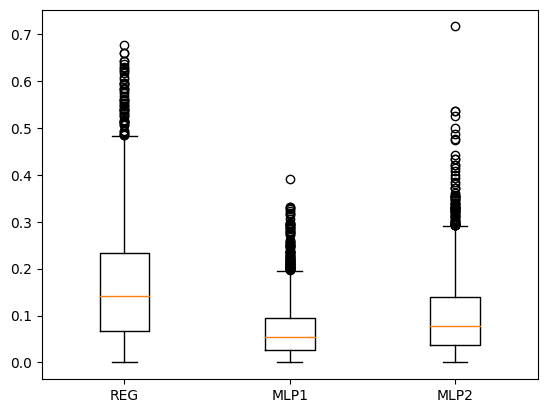

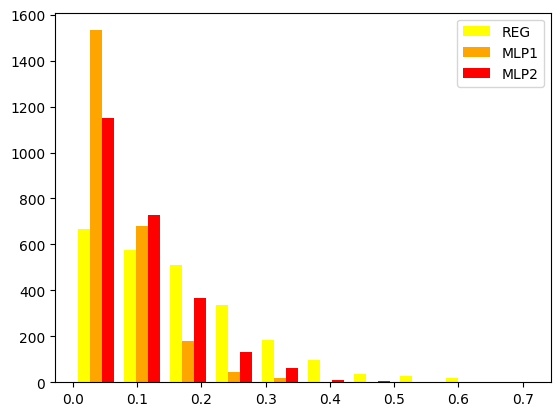

MLP1 num of iter 452
MLP2 num of iter 77


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor

data = loadarff('kin8nm.arff')
df = pd.DataFrame(data[0])
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

reg = Ridge(alpha = 0.1)
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)
print('Ridge MAE:', mean_absolute_error(y_test, y_pred_reg))

mlp1 = MLPRegressor(hidden_layer_sizes = (10, 10,), activation = 'tanh', max_iter = 500, random_state = 0, early_stopping = True)
mlp1.fit(X_train.values, y_train.values)
y_pred_mlp1 = mlp1.predict(X_test.values)
print('MLP1 MAE:', mean_absolute_error(y_test, y_pred_mlp1))

mlp2 = MLPRegressor(hidden_layer_sizes = (10, 10,), activation = 'tanh', max_iter = 500, random_state = 0, early_stopping = False)
mlp2.fit(X_train.values, y_train.values)
y_pred_mlp2 = mlp2.predict(X_test.values)
print('MLP2 MAE:', mean_absolute_error(y_test, y_pred_mlp2))

residue_reg = np.array(abs(y_pred_reg - y_test))
residue_mlp1 = np.array(abs(y_pred_mlp1 - y_test))
residue_mlp2 = np.array(abs(y_pred_mlp2 - y_test))

fig, ax = plt.subplots()

ax.boxplot([residue_reg, residue_mlp1, residue_mlp2])
ax.set_xticklabels(['REG', 'MLP1','MLP2'])
plt.show()

plt.hist([residue_reg, residue_mlp1, residue_mlp2], 10,color=['yellow', 'orange', 'red'], label=['REG', 'MLP1', 'MLP2'])
plt.legend()
plt.show()

print('MLP1 num of iter', mlp1.n_iter_)
print('MLP2 num of iter', mlp2.n_iter_)